![k-mean clustering](./img/clustering.png)

In [ ]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/tekbahadurkshetri/uber-clustering")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 4.78M/4.78M [00:00<00:00, 99.6MB/s]

In [ ]:
df = pd.read_csv("uber-clustering/uber_clean.csv")

In [ ]:

df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


# Thuật toán KMean Clustering

## Sơ lượt về Kmean thuật toán cơ bản của Unspervised Learing

Tôi đặt ra một bài toán tôi muốn phân loại vùng hoạt động của khách của ubar đặt xe và xuống xe, ở thuật toán kmeans sẽ phân ra thành các cụm riêng biệt

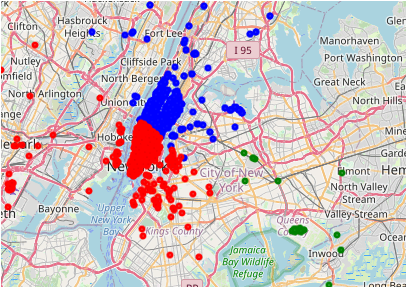

ở hình trên tôi chọn 3 vùng để phân dữ liệu, bài toán đặt ra ở đây là nó phân loại như thế nào

Ý tưởng đơn giản nhất về cluster (cụm) là tập hợp các điểm ở gần nhau trong một không gian nào đó (không gian này có thể có rất nhiều chiều trong trường hợp thông tin về một điểm dữ liệu là rất lớn). Hình bên dưới là một ví dụ về 3 cụm dữ liệu (từ giờ tôi sẽ viết gọn là cluster).

trung tâm (center) của một phâm cụm, Một cách đơn giản nhất, xét một điểm bất kỳ, ta xét xem điểm đó gần với center nào nhất thì nó thuộc về cùng nhóm với center đó.
điểm nào gần với center thì nó sẽ thuộc vào vùng phân cụm đó
điểm center được tính như thế nào thì chúng ta phải đi sau vào phân tích thuật toán của nó:


Source : để hiểu về phân tích toán học về thuật toán
https://machinelearningcoban.com/2017/01/01/kmeans/#tom-tat-thuat-toan

Thuật toán :

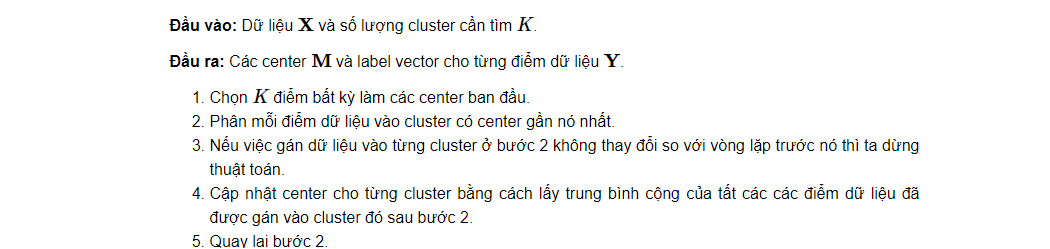

Code source thuật toán : cre machine learning cơ bản

code gồm 4 hàm như sau:

kmeans_init_centers để khởi tạo các centers ban đầu (thường là bất kì)

kmeans_asign_labels để gán nhãn mới cho điểm khi biết các centers

kmeans_update_centers để cập nhật các centers mới trên dữ liệu được gán nhãn

has_converged để kiểm tra điều kiện dừng của thuật toán

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [ ]:
x_array = x.values

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [ ]:
K = 3
(centers, labels, it) = kmeans(x_array, K)
print('Centers found by our algorithm:')
print(centers[-1])


Centers found by our algorithm:
[[ 40.72033555 -73.80524619]
 [ 40.76587889 -73.97191201]
 [ 40.71732413 -73.99460013]]


In [ ]:
print(labels[-1])

[1 1 2 ... 2 2 2]


In [ ]:
print(y_kmeans)

[2 2 0 ... 4 0 0]


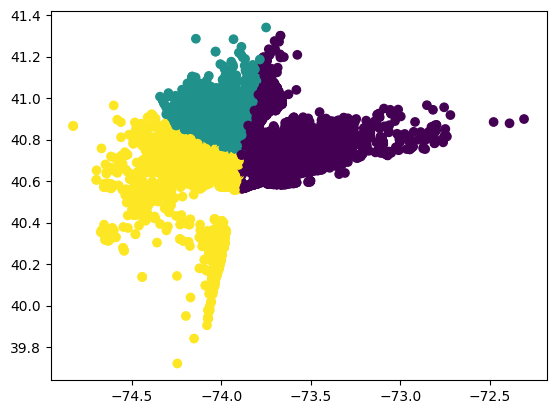

In [ ]:
plt.scatter(df['Lon'], df['Lat'], c=c)

In [ ]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [ ]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(len(y_kmeans))

796121


In [ ]:
df['y'] = y_kmeans


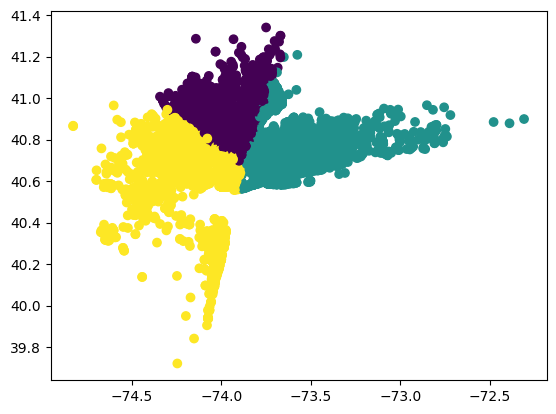

In [ ]:
plt.scatter(df['Lon'], df['Lat'], c=y_kmeans)

In [ ]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

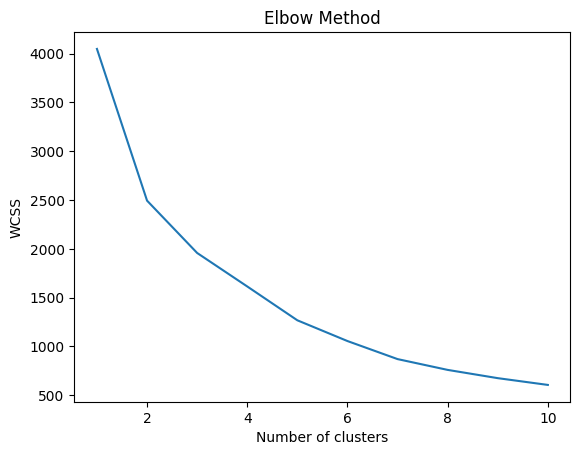

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
df = df[:2000]

cluster1 = df[['Lat', "Lon"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', "Lon"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', "Lon"]][df['y'] == 2].values.tolist()


In [ ]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

In [ ]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

In [ ]:
map

# Hierarchical clustering

Phân cụm theo cấp bậc (Hierarchical clustering): thuật toán này bắt đầu bằng cách nhóm các điểm gần nhất lại với nhau và tiếp tục theo cách này cho đến khi chúng ta có một số nhóm được xác định rõ ràng.
Phân cụm phân cấp là một phương pháp phân cụm dữ liệu trong lĩnh vực khám phá dữ liệu và học máy. Thuật toán này xây dựng các nhóm từ dữ liệu, bắt đầu bằng cách xem xét từng điểm dữ liệu như là một nhóm riêng biệt và sau đó liên tục gộp nhóm gần nhau nhất.

Thuật toán hoạt động theo cách sau:

Khởi tạo mỗi điểm dữ liệu là một nhóm độc lập.
Tính khoảng cách giữa tất cả các nhóm. Thông thường, khoảng cách được đo bằng cách sử dụng các phương pháp như khoảng cách Euclidean giữa trung tâm của các nhóm hoặc khoảng cách đơn giản nhất giữa các điểm cực kỳ gần nhau.
Gộp hai nhóm gần nhau nhất thành một nhóm mới. Các phương pháp khác nhau có thể được sử dụng để xác định "gần nhau nhất," bao gồm cả single linkage (gộp nhóm bằng cách sử dụng khoảng cách giữa hai điểm gần nhau nhất), complete linkage (gộp nhóm bằng cách sử dụng khoảng cách giữa hai điểm xa nhất trong hai nhóm), và average linkage (gộp nhóm bằng cách sử dụng khoảng cách trung bình giữa tất cả các cặp điểm).
Lặp lại bước 2 và 3 cho đến khi chỉ còn một nhóm duy nhất hoặc số lượng nhóm mong muốn.
Kết quả của thuật toán là một cấu trúc cây, còn gọi là dendrogram, mô tả cách các nhóm đã được hợp nhất theo thời gian. Dendrogram cung cấp cái nhìn tổng quan về mức độ tương đồng giữa các điểm dữ liệu. Bằng cách cắt dendrogram tại một mức độ tương đồng cụ thể, chúng ta có thể xác định số lượng nhóm mong muốn.

nguyên tắt hoạt động của nó xem ở wed này : https://www.displayr.com/what-is-hierarchical-clustering/#:~:text=Hierarchical%20clustering%2C%20also%20known%20as,broadly%20similar%20to%20each%20other.

hiểu sâu về các phương pháp và khoảng cách đo : https://viblo.asia/p/hierarchical-clustering-phan-cum-du-lieu-maGK7q2elj2

https://phamdinhkhanh.github.io/deepai-book/ch_ml/HierarchicalClustering.html



In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np



Text(0.5, 1.0, 'Vi tri don va tra khach')

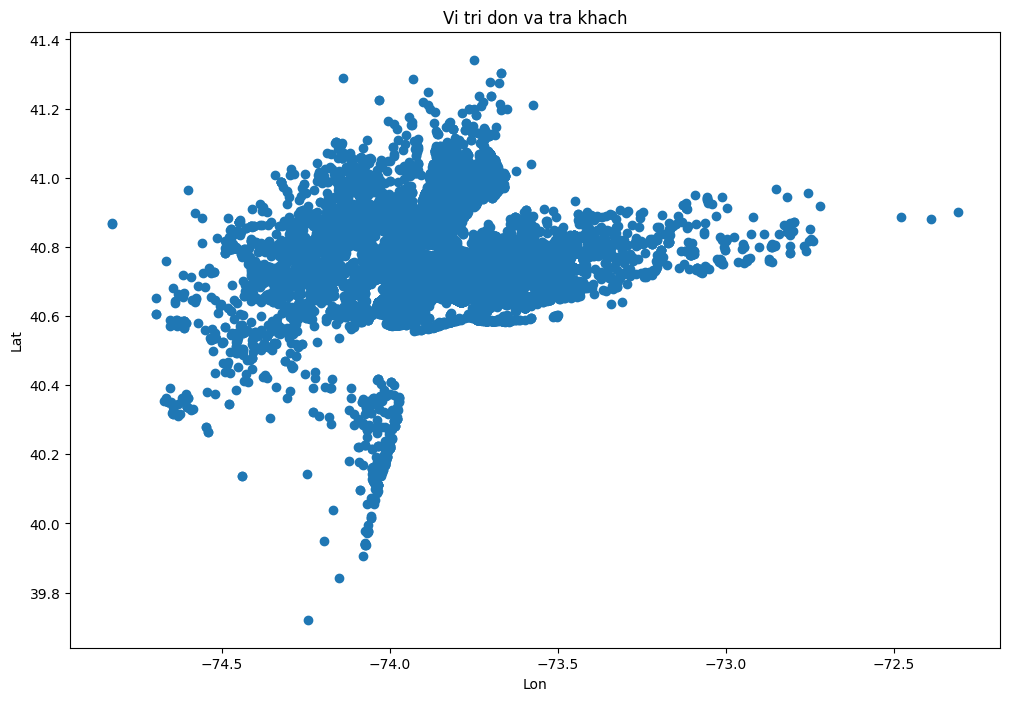

In [ ]:
plt.figure(figsize = (12,8))
# plt.scatter(df['Lon'], df['Lat'], c=y_kmeans)
plt.scatter(df['Lon'],df['Lat'])

plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('Vi tri don va tra khach')

In [ ]:
std = MinMaxScaler()
X_std = std.fit_transform(x)

Vẽ Biểu đồ Dendrogram

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hỉearchical clustering thuật toán quá là mạnh không chạy nổi